Домашнее задание.


Потренируем навыки, полученные на практическом занятии.


Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

In [2]:
# Данные вы сможете получить исполнив следующий код:

from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('housing.csv')
# файл я скачал с Kaggle

In [4]:
# Переменная, которую надо предсказать - ’MEDV’.
# Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

посмотрим что в датасете есть

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.65660,0.0,19.58,0,0.8710,6.122,97.3,1.6180,5,403,14.7,14.10,21.5
1,0.10612,30.0,4.93,0,0.4280,6.095,65.1,6.3361,6,300,16.6,12.40,20.1
2,2.33099,0.0,19.58,0,0.8710,5.186,93.8,1.5296,5,403,14.7,28.32,17.8
3,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,3.01,46.0
4,1.15172,0.0,8.14,0,0.5380,5.701,95.0,3.7872,4,307,21.0,18.35,13.1


посмотрим типы данных

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 13 columns):
CRIM       198 non-null float64
ZN         198 non-null float64
INDUS      198 non-null float64
CHAS       198 non-null int64
NOX        198 non-null float64
RM         198 non-null float64
AGE        198 non-null float64
DIS        198 non-null float64
RAD        198 non-null int64
TAX        198 non-null int64
PTRATIO    198 non-null float64
LSTAT      198 non-null float64
MEDV       198 non-null float64
dtypes: float64(10), int64(3)
memory usage: 20.2 KB


посмотрим если ли NULL значниея

In [17]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Посмотрим что же за данные 

- CRIM     per capita crime rate by town (уровень преступности на душу населения по городам)
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft. (доля жилой земли, зонированной для участков более 25 000 кв.)
- INDUS    proportion of non-retail business acres per town (доля неторговых площадей на город)
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- NOX      nitric oxides concentration (parts per 10 million) (концентрация оксидов азота (частей на 10 миллионов))
- RM       average number of rooms per dwelling (среднее количество комнат в доме)
- AGE      proportion of owner-occupied units built prior to 1940 (доля домовладельцев, построенных до 1940 года)
- DIS      weighted distances to five Boston employment centres (взвешенные расстояния до пяти бостонских центров занятости)
- RAD      index of accessibility to radial highways (индекс доступности к радиальным магистралям)
- TAX      full-value property-tax rate per $10,000 (ставка налога на имущество на полную стоимость за 10 000 долларов США)
- PTRATIO  pupil-teacher ratio by town (Соотношение учеников и учителей по городам)
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 (Bk - 0,63) ^ 2 где Bk - доля чернокожих по городам)
- LSTAT    % lower status of the population (% ниже статус населения)

Предсказать нужно - MEDV (Средняя стоимость домов, занимаемых владельцами, в 1000 долл. США)

In [58]:
data['CRIM'].describe()

count    198.000000
mean       3.663398
std        8.754916
min        0.006320
25%        0.085120
50%        0.307245
75%        3.952085
max       88.976200
Name: CRIM, dtype: float64

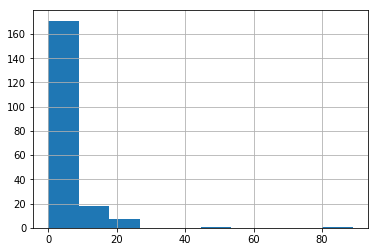

In [60]:
data['CRIM'].hist()

У CRIM есть несколько очень больших значений, большое расхождение макс и среднего. Но врядтли это можно назвать выбросами.

В колонке CRIM (уровень преступности на душу населения по городам) макс сильно отличается от среднего посмотрим сколько таких

In [63]:
data.query('CRIM > 30')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
23,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
147,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0


Вывод: Логически это может быть правдой. Но в предсказании это может помешать.

Проверяем данные по каждой колонке исходя из её логического смысла
ZN - доля жилой земли, зонированной для участков более 25 000 кв. фут
Что-то скорей всего мало связанное со стоимостью жилья.
Смотрим что за значения

In [56]:
data['ZN'].describe()

count    198.000000
mean       9.646465
std       21.854590
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       95.000000
Name: ZN, dtype: float64

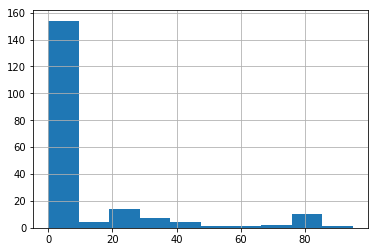

In [57]:
data['ZN'].hist()

Очень много 0 значений. Выбрасываем. Этот параметр не будет участвовать в модели.

Смотрим следующую колонку INDUS - proportion of non-retail business acres per town (доля неторговых площадей на город).
По смыслу может повлиять на стоимость, но надо смотреть что в данных 

In [71]:
data['INDUS'].describe()

count    198.000000
mean      11.138434
std        6.913696
min        0.460000
25%        5.190000
50%        8.560000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

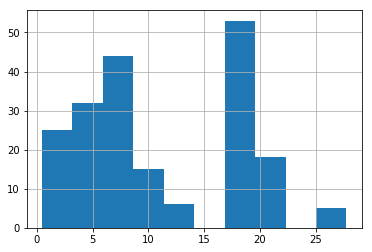

In [69]:
data['INDUS'].hist()

Похоже на интересные данные, смотрим дальше

Колонка CHAS -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))

Какое-то удаление от реки. Переводится как Фиктивная переменная Чарльза.

In [72]:
data['CHAS'].describe()

count    198.000000
mean       0.065657
std        0.248309
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

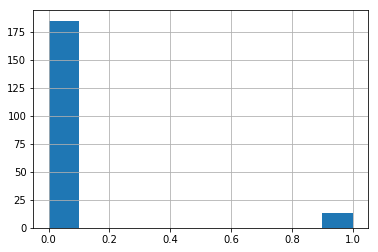

In [73]:
data['CHAS'].hist()

In [83]:
print('Кол-во строк где CHAS = 1 равно: ',data.query('CHAS == 1')['CHAS'].count())
print('Кол-во строк где CHAS = 0 равно: ',data.query('CHAS == 0')['CHAS'].count())

Кол-во строк где CHAS = 1 равно:  13
Кол-во строк где CHAS = 0 равно:  185


Корреляции с другими колонками не обнаружил.
Выбрасываем CHAS, на модель влиять скорей всего не будет.

Смотрим дальше NOX

In [98]:
data['NOX'].describe()

count    198.00000
mean       0.55564
std        0.11563
min        0.39800
25%        0.45425
50%        0.53500
75%        0.62400
max        0.87100
Name: NOX, dtype: float64

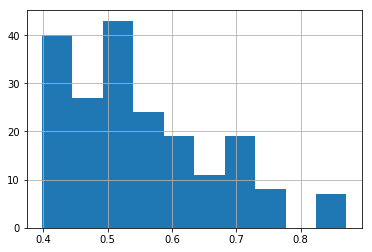

In [99]:
data['NOX'].hist()

Данные похоже на нормальные, есть какое-то распределение.

Исходя из графиков кореляий data.corr(), NOX корелирует с INDUS, оба ославляем для модели.

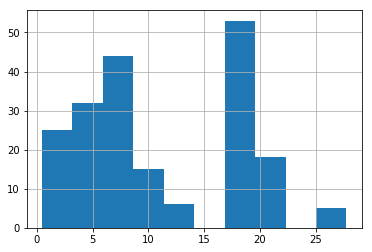

In [101]:
data['INDUS'].hist()

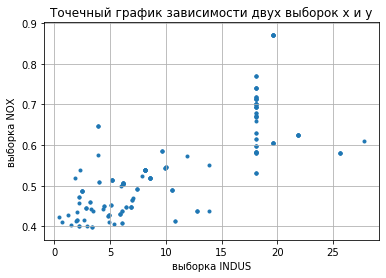

In [16]:
x = data['INDUS']
y = data['NOX']
plt.xlabel('выборка INDUS')
plt.ylabel('выборка NOX')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Дальше смотрим остальные столбцы.

In [109]:
data['RM'].describe()

count    198.000000
mean       6.238091
std        0.720956
min        3.561000
25%        5.856750
50%        6.168000
75%        6.564500
max        8.398000
Name: RM, dtype: float64

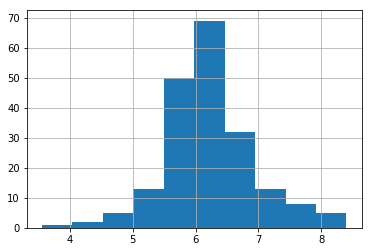

In [110]:
data['RM'].hist()

RM - нужен

In [111]:
data['AGE'].describe()

count    198.000000
mean      69.714646
std       28.099593
min        6.200000
25%       45.025000
50%       79.750000
75%       93.800000
max      100.000000
Name: AGE, dtype: float64

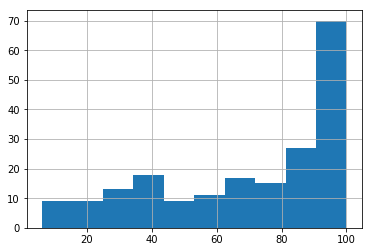

In [113]:
data['AGE'].hist()

AGE - доля заселенных домов, построенных до 1940 года.
По смыслу должен иметь отрицательное влияние на MEDV

In [114]:
data['DIS'].describe()

count    198.000000
mean       3.670479
std        1.969713
min        1.129600
25%        2.090175
50%        2.948150
75%        5.067075
max       10.585700
Name: DIS, dtype: float64

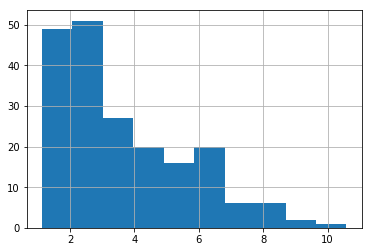

In [115]:
data['DIS'].hist()

DIS - взвешенные расстояния до пяти бостонских центров занятости
По смыслу должен влиять на цену. Данные вроде в порядке в это колонке.

In [116]:
data['RAD'].describe()

count    198.000000
mean       9.666667
std        8.804706
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

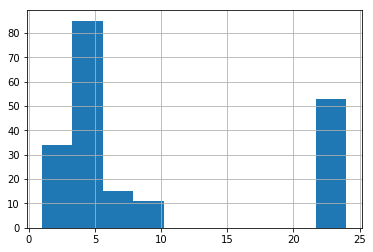

In [118]:
data['RAD'].hist()

сгруппируем по значениям чтобы посмотреть какие встречаются

In [218]:
data.groupby(['RAD']).count()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
RAD,,,,,,,,,,,,
1,7,7,7,7,7,7,7,7,7,7,7,7
2,12,12,12,12,12,12,12,12,12,12,12,12
3,15,15,15,15,15,15,15,15,15,15,15,15
4,42,42,42,42,42,42,42,42,42,42,42,42
5,43,43,43,43,43,43,43,43,43,43,43,43
6,10,10,10,10,10,10,10,10,10,10,10,10
7,5,5,5,5,5,5,5,5,5,5,5,5
8,11,11,11,11,11,11,11,11,11,11,11,11
24,53,53,53,53,53,53,53,53,53,53,53,53


RAD - индекс доступности к радиальным магистралям. Вроде тоже есть распределение и возможно влияние на цену.

In [123]:
data['TAX'].describe()

count    198.000000
mean     409.050505
std      168.983547
min      188.000000
25%      281.750000
50%      341.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

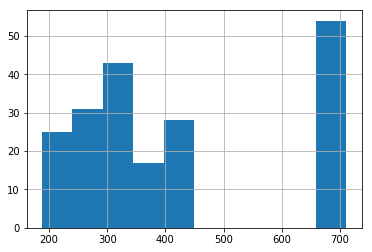

In [124]:
data['TAX'].hist()

TAX - ставка налога на имущество на полную стоимость за 10 000 долларов США.

Точно должно влиять на прогнозирование цены

In [130]:
data['PTRATIO'].describe()

count    198.000000
mean      18.581313
std        2.140545
min       12.600000
25%       17.400000
50%       19.100000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

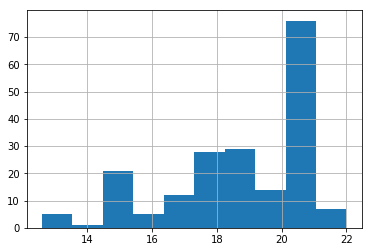

In [131]:
data['PTRATIO'].hist()

PTRATIO - Соотношение учеников и учителей по городам.

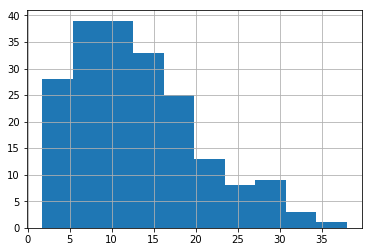

In [133]:
data['LSTAT'].hist()

In [135]:
data['LSTAT'].describe()

count    198.000000
mean      13.096263
std        7.423102
min        1.730000
25%        7.532500
50%       12.075000
75%       17.302500
max       37.970000
Name: LSTAT, dtype: float64

LSTAT - % снижения популяции видимо. 
То есть повидимому чем менее густо заселен район, тем жильё должно быть дороже?!

Итого мы точно удаляем только две колонки, которые по видимому не повлияют цену. Удалим MEDV тоже потому, что её нам надо предсказать.

In [17]:
res_data = data

In [18]:
# Удаляем не нужные данные
res_data = res_data.drop(['ZN'],axis=1)
res_data = res_data.drop(['CHAS'],axis=1)

Смотрим что получилось

In [19]:
res_data.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,0.402545,0.400997,-0.146927,0.323086,-0.387096,0.610588,0.576905,0.267805,0.364332,-0.319134
INDUS,0.402545,1.000000,0.759822,-0.410962,0.596133,-0.706860,0.600863,0.697366,0.361537,0.588737,-0.447509
NOX,0.400997,0.759822,1.000000,-0.308797,0.689720,-0.759367,0.586397,0.642241,0.150257,0.551733,-0.367346
RM,-0.146927,-0.410962,-0.308797,1.000000,-0.201765,0.173928,-0.189752,-0.275647,-0.330340,-0.607947,0.663319
AGE,0.323086,0.596133,0.689720,-0.201765,1.000000,-0.741666,0.426854,0.449106,0.257451,0.560894,-0.306575
DIS,-0.387096,-0.706860,-0.759367,0.173928,-0.741666,1.000000,-0.515007,-0.539043,-0.219101,-0.479304,0.159727
RAD,0.610588,0.600863,0.586397,-0.189752,0.426854,-0.515007,1.000000,0.921748,0.449244,0.439199,-0.318696
TAX,0.576905,0.697366,0.642241,-0.275647,0.449106,-0.539043,0.921748,1.000000,0.424537,0.489764,-0.411226
PTRATIO,0.267805,0.361537,0.150257,-0.330340,0.257451,-0.219101,0.449244,0.424537,1.000000,0.361859,-0.459095
LSTAT,0.364332,0.588737,0.551733,-0.607947,0.560894,-0.479304,0.439199,0.489764,0.361859,1.000000,-0.715905


посмотрим что с чем может корреливровать 

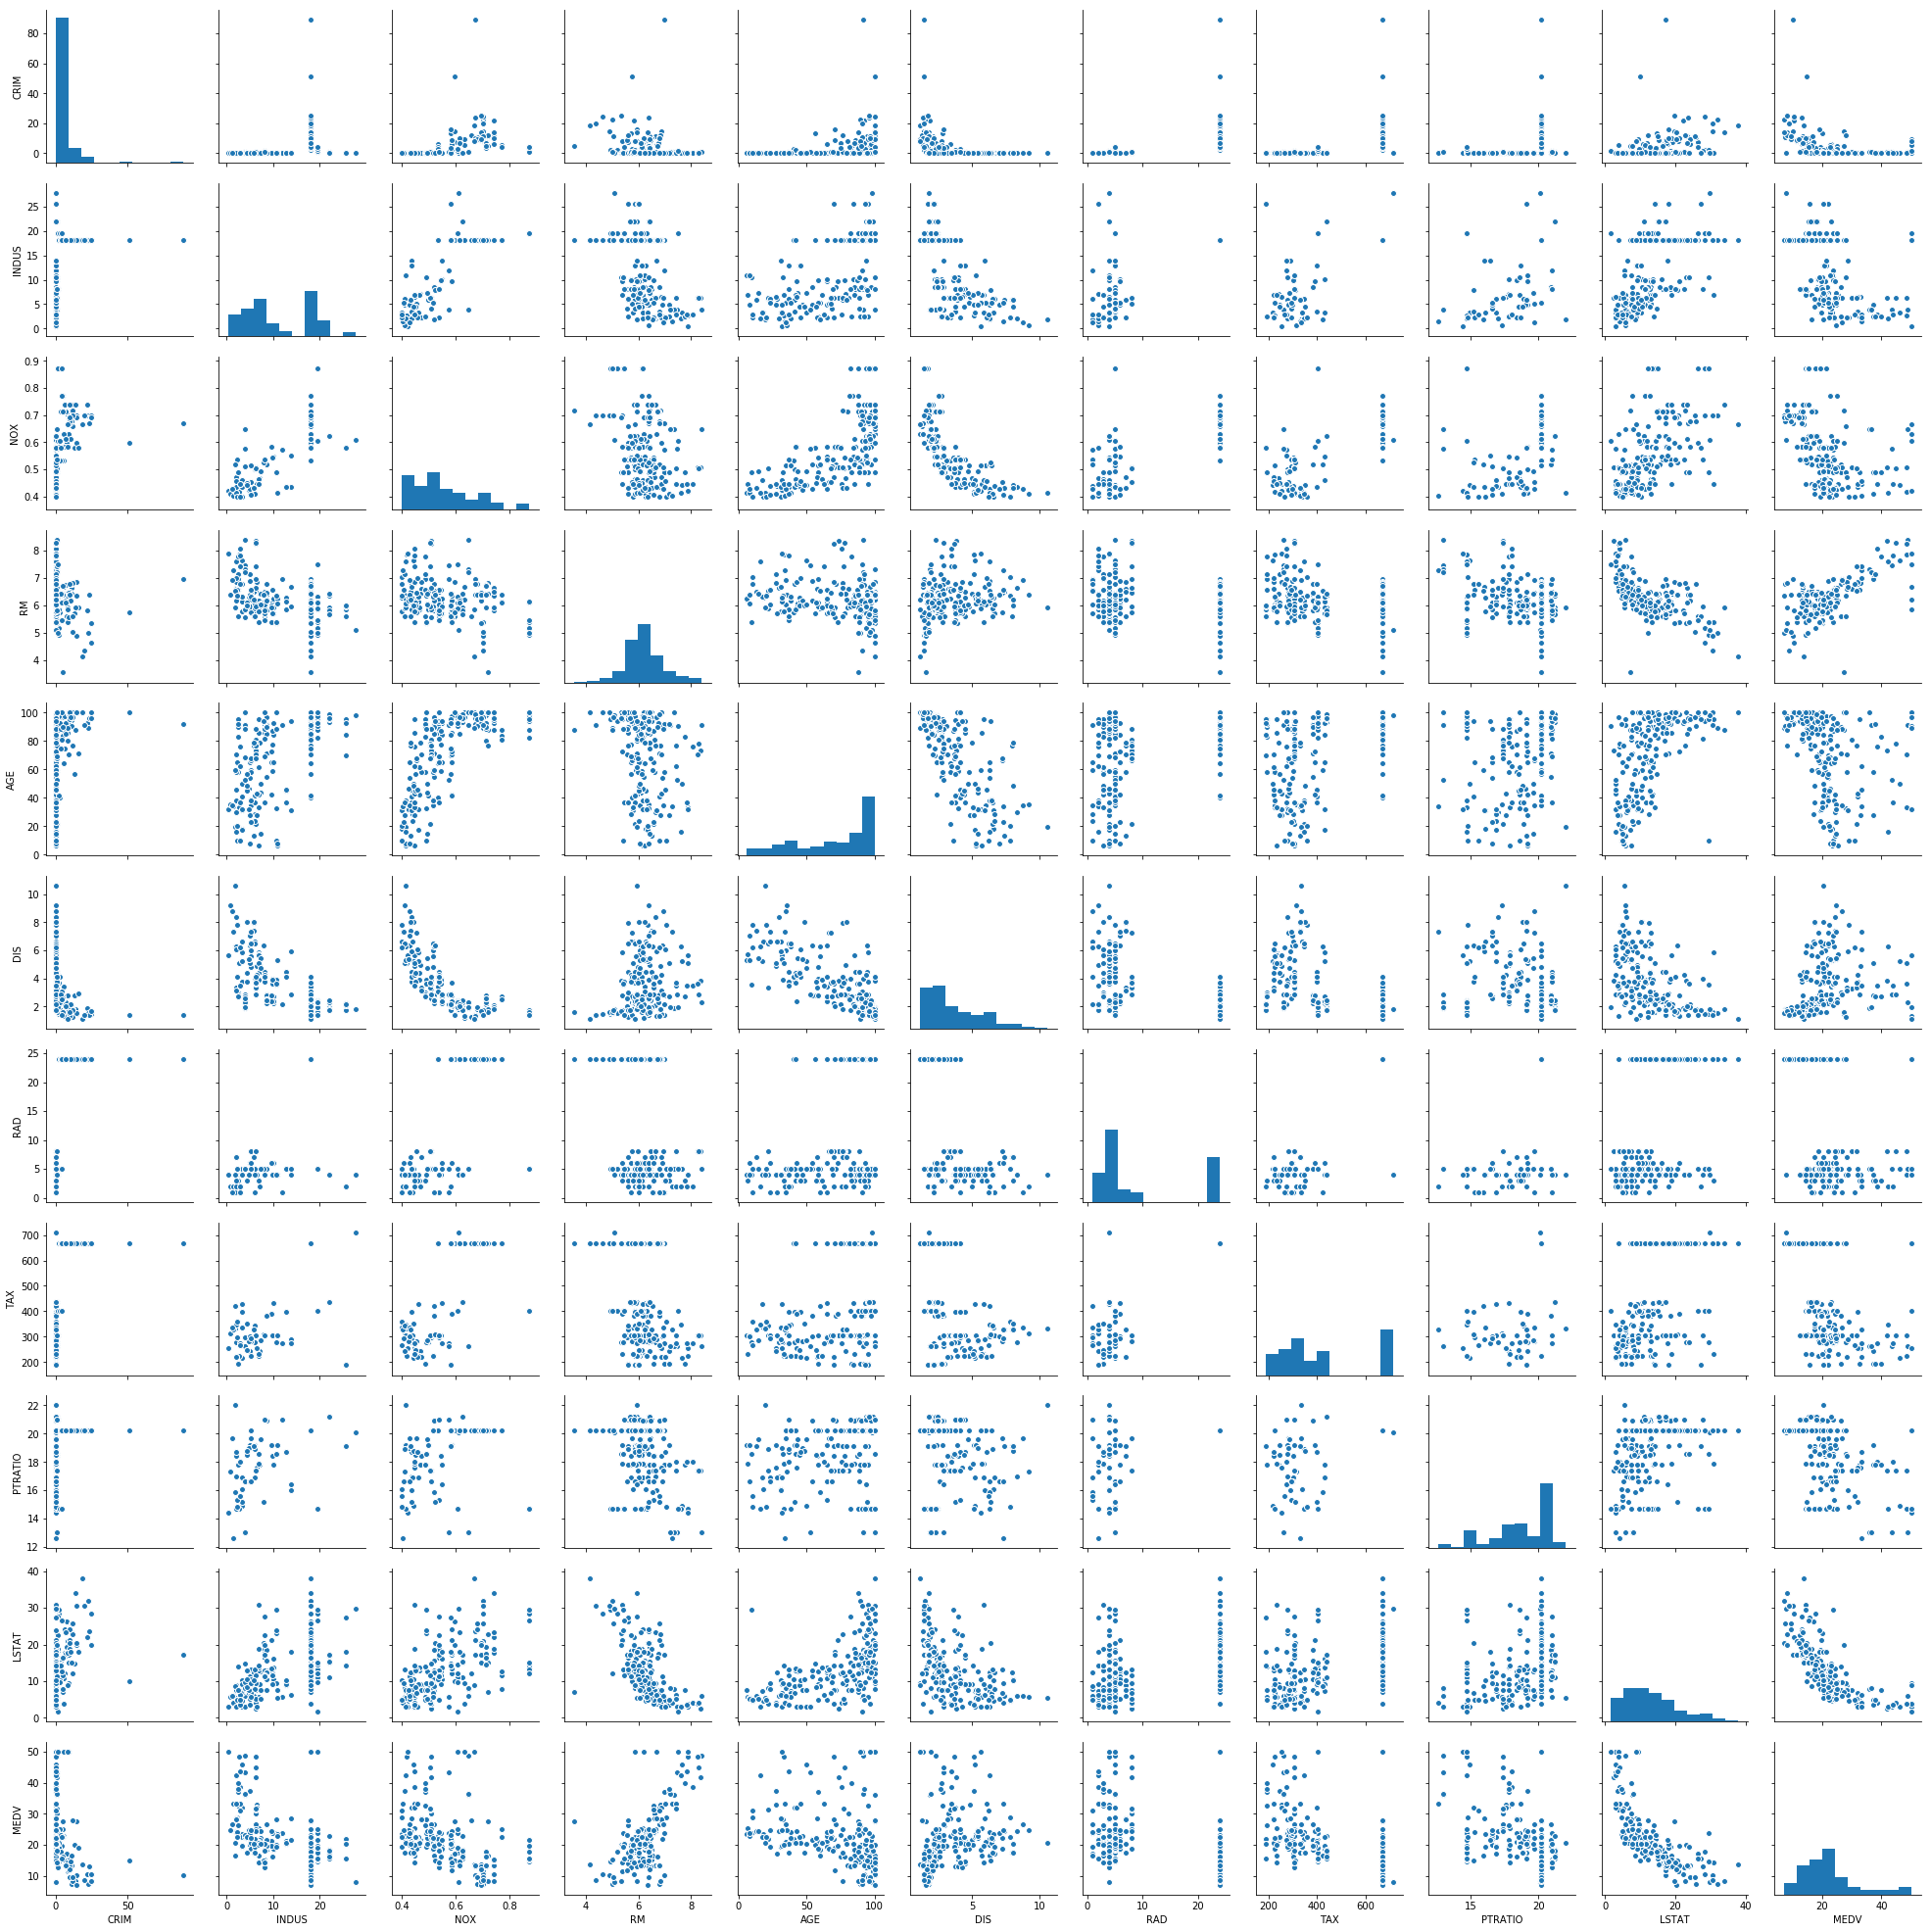

In [219]:
sns.pairplot(res_data)

посмотрим тепловую карту кореляции

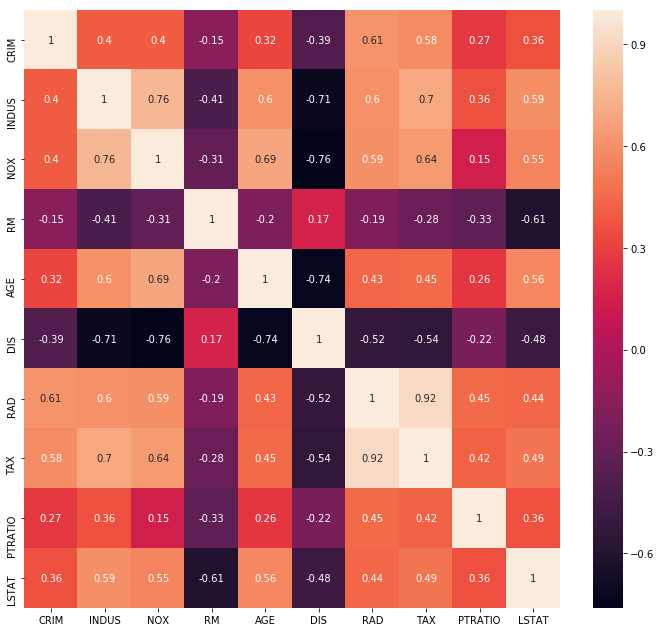

In [159]:
correlation_matrix = res_data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,11))
sns.heatmap(data=correlation_matrix, annot=True)

Смотрим какие остались колонки

In [167]:
res_data.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

Удалил целевую, возвращаю

In [168]:
res_data['MEDV'] = data.loc[res_data.index]['MEDV']

Подготавливаем данны для обучения

In [206]:
X_columns = res_data.columns[:-1]
y_column = res_data.columns[-1]

X_columns, y_column

(Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
        'LSTAT'],
       dtype='object'), 'MEDV')

In [207]:
X = res_data[X_columns]
y = res_data[y_column]

In [208]:
print(X.head())
print(y.head())

      CRIM  INDUS     NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  LSTAT
0  1.65660  19.58  0.8710  6.122  97.3  1.6180    5  403     14.7  14.10
1  0.10612   4.93  0.4280  6.095  65.1  6.3361    6  300     16.6  12.40
2  2.33099  19.58  0.8710  5.186  93.8  1.5296    5  403     14.7  28.32
3  0.06129   3.33  0.4429  7.645  49.7  5.2119    5  216     14.9   3.01
4  1.15172   8.14  0.5380  5.701  95.0  3.7872    4  307     21.0  18.35
0    21.5
1    20.1
2    17.8
3    46.0
4    13.1
Name: MEDV, dtype: float64


Делим на тест и данные для обучения

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [210]:
X_train.shape, X_test.shape

((158, 10), (40, 10))

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [212]:
estimator = LinearRegression()
estimator.fit(X_train, y_train) # обучение

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred))) # среднеквадратичная ошибка (отклонение)
print("MAE: \t", mean_absolute_error(y_test, y_pred)) # среднеабсолютное отклонение

R2: 	 0.39011060066772685
RMSE: 	 6.609110361396406
MAE: 	 4.576106085169352


Сомтрим что в исходном значении было

In [213]:
res_data['MEDV'].describe()

count    198.000000
mean      22.307576
std        9.433287
min        7.200000
25%       16.200000
50%       20.600000
75%       24.775000
max       50.000000
Name: MEDV, dtype: float64

Коэф. ошибки около минимального значения MEDV наверно это многовато. 

В процентном выражении наверно можно вычислить так 

In [215]:
(np.sqrt(mean_squared_error(y_test, y_pred)) / res_data['MEDV'].mean()) * 100

29.627201239704043

Обучилась не очень то хорошо, но и данных маловато. Может стоит выбросить еще какие-то фичи.

In [182]:
estimator.intercept_

17.12989091226818

Обучу модель на начальных данных, для сравнения.


In [6]:
XX_columns = data.columns[:-1]
yy_column = data.columns[-1]

XX_columns, yy_column

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'LSTAT'],
       dtype='object'), 'MEDV')

In [8]:
XX = data[XX_columns]
yy = data[yy_column]

In [9]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=30)

Посмотрим размерности

In [11]:
XX_train.shape, XX_test.shape

((158, 12), (40, 12))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [13]:
estimator = LinearRegression()
estimator.fit(XX_train, yy_train) # обучение

yy_pred = estimator.predict(XX_test)

print("R2: \t", r2_score(yy_test, yy_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(yy_test, yy_pred))) # среднеквадратичная ошибка (отклонение)
print("MAE: \t", mean_absolute_error(yy_test, yy_pred)) # среднеабсолютное отклонение

R2: 	 0.44961410750922615
RMSE: 	 6.278430748107243
MAE: 	 4.323861958507314


In [14]:
(np.sqrt(mean_squared_error(yy_test, yy_pred)) / data['MEDV'].mean()) * 100

28.14483660769394

In [15]:
estimator.intercept_

31.905919831191902

Вывод:

Моя модель на обрезанных данных (res_data) хуже чем на полных данных :)  

Попробую выкинуть все не корелирующию данные

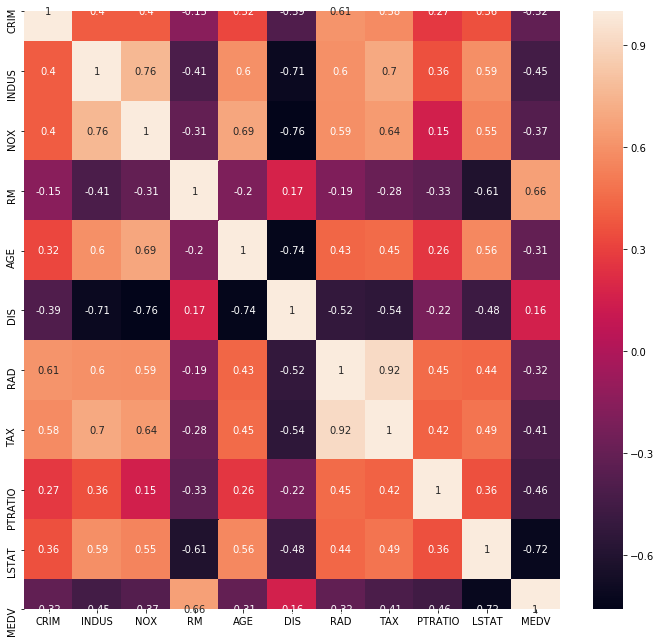

In [20]:
correlation_matrix = res_data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,11))
sns.heatmap(data=correlation_matrix, annot=True)

In [21]:
res_data2 = res_data

RM - слабо корелирует со всеми остальгными столбцами

DIS - вообще не корелирует

In [26]:
# res_data2 = res_data2.drop(['RM'],axis=1)
# res_data2 = res_data2.drop(['DIS'],axis=1)

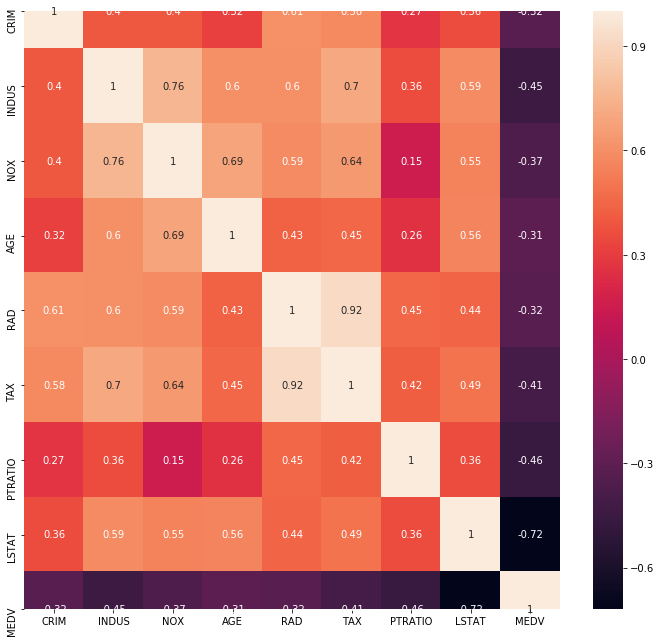

In [33]:
correlation_matrix = res_data2.corr().round(2)
fig, ax = plt.subplots(figsize=(12,11))
sns.heatmap(data=correlation_matrix, annot=True)

На остальных еще раз попробую обучить модель

In [27]:
XXX_columns = res_data2.columns[:-1]
yyy_column = res_data2.columns[-1]

XXX_columns, yyy_column

(Index(['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object'),
 'MEDV')

In [28]:
XXX = data[XXX_columns]
yyy = data[yyy_column]

In [29]:
from sklearn.model_selection import train_test_split
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, yyy, test_size=0.2, random_state=30)

In [30]:
XXX_train.shape, XXX_test.shape

((158, 8), (40, 8))

In [31]:
estimator = LinearRegression()
estimator.fit(XXX_train, yyy_train) # обучение

yyy_pred = estimator.predict(XXX_test)

print("R2: \t", r2_score(yyy_test, yyy_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(yyy_test, yyy_pred))) # среднеквадратичная ошибка (отклонение)
print("MAE: \t", mean_absolute_error(yyy_test, yyy_pred)) # среднеабсолютное отклонение

R2: 	 0.43836815908795457
RMSE: 	 6.342249491253461
MAE: 	 4.506772031843584


In [32]:
(np.sqrt(mean_squared_error(yyy_test, yyy_pred)) / data['MEDV'].mean()) * 100

28.43092212339389

Получилось что-то близкое к модели которая на всех данных построена. 

Выходит стоимость домов не особо зависит от остальных параметров, либо нужно быльше данных. Но скорее всего нужно еще уменьшать количество параметров.  